In [71]:
import pickle as pkl 
import numpy as np 
import matplotlib.pyplot as plt
from qiskit.quantum_info import state_fidelity
import math

from analysis_utils import correct_counts, counts_to_statevector

In [8]:
with open('d1q2_shot_counts.pkl', 'rb') as f:
    counts_all = pkl.load(f)

with open('d1q2_statevectors.pkl', 'rb') as f:
    sv_all = pkl.load(f)

In [10]:
M = 64 # sorry for the hard coding
nrm = 0.8185352771872451 # sorry for the hard coding
def graph(counts_sv, sv, M):

    plt.xlabel("Lattice Site")
    plt.ylabel("Concentration")
    plt.title(f"Concentration at Lattice Sites at t = {i}")

    plt.plot(list(range(0,M,1)), 2**(1)*nrm*np.array(counts_sv)[:M:], label='Finite Sampling')

    plt.plot(list(range(0,M,1)), 2**(1)*nrm*np.array(sv)[:M:], label="State vector")

    plt.legend()
    plt.show()

fidelity_arr = {}

for i in list(counts_all.keys()):
    counts = counts_all[i]

    if len(list(counts.values())) != pow(2, 8):
        counts = correct_counts(counts, 8)   

    counts_sv = counts_to_statevector(counts)
    expected_sv = sv_all[i]

    fid = state_fidelity(counts_sv, expected_sv)

    fidelity_arr[i] = fid

plt.plot(list(range(50)), list(fidelity_arr.values()))
plt.xlabel("Iteration")
plt.ylabel("Fidelity")
plt.title(f"Fidelity of Finite Sampling using Prepared States By Iteration")

In [25]:
with open('d1q2_fidelity_per_iteration.pkl', 'wb') as f:
    pkl.dump(fidelity_arr, f)

In [76]:
# graph counts vs number shots
with open('d1q2_sampleincr_counts.pkl', 'rb') as f:
    sampleincr_counts_all = pkl.load(f)

with open('d1q2_sampleincr_statevector.pkl', 'rb') as f:
    sampleincr_sv_all = pkl.load(f)

In [78]:
keys = list(sampleincr_counts_all.keys())

fidelity_keys = []
fidelity_values = []

for power, iteration in keys:
    counts = sampleincr_counts_all[(power, iteration)]
    expected_sv = sampleincr_sv_all[(power, iteration)]

    if len(list(counts.values())) != pow(2, 8):
        counts = correct_counts(counts, 8)   

    counts_sv = counts_to_statevector(counts)

    fid = state_fidelity(counts_sv, expected_sv)

    fidelity_keys.append(power)
    fidelity_values.append(fid)

In [74]:
# take log of the value
for i in range(len(fidelity_values)):
    fidelity_values[i] = math.log10(fidelity_values[i])

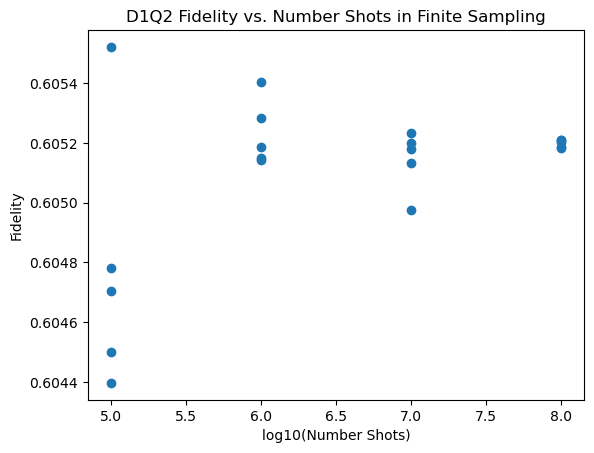

In [80]:
x = fidelity_keys
y = fidelity_values

plt.close('all')
plt.xlabel("log10(Number Shots)")
plt.ylabel("Fidelity")
plt.title(f"D1Q2 Fidelity vs. Number Shots in Finite Sampling")

plt.scatter(x, y)

plt.show()